In [74]:
import numpy
import scipy.special

import matplotlib.pyplot
%matplotlib inline
import scipy.misc

# neural network class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer (i <-> j???)
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # Convert inputs_list to 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # Update weights
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

    def query_hidden(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return hidden_outputs

    def backquery(self, target_array):
        final_outputs = numpy.array(target_array, ndmin=2).T
        final_inputs = scipy.special.logit(final_outputs)
        #print(final_inputs.T)

        tmp = numpy.dot(n.who.T, n.who)
        tmp2 = numpy.linalg.inv(tmp)
        tmp3 = numpy.dot(tmp2, n.who.T)
        hidden_outputs = numpy.dot(tmp3, final_inputs)
        hidden_outputs = hidden_outputs - numpy.min(hidden_outputs)
        hidden_outputs = hidden_outputs / numpy.max(hidden_outputs)
        hidden_outputs = 0.01 + 0.98 * hidden_outputs
        hidden_inputs = scipy.special.logit(hidden_outputs)
        #print(hidden_outputs.T)
        #print(hidden_inputs.T)

        tmp = numpy.dot(n.wih.T, n.wih)
        tmp2 = numpy.linalg.inv(tmp)
        tmp3 = numpy.dot(tmp2, n.wih.T)
        input_outputs = numpy.dot(tmp3, hidden_inputs)
        input_outputs = input_outputs - numpy.min(input_outputs)
        input_outputs = input_outputs / numpy.max(input_outputs)
        input_outputs = 0.01 + 0.98 * input_outputs
        inputs = scipy.special.logit(input_outputs)
        matplotlib.pyplot.imshow(inputs.reshape([28, 28]), cmap='Greys', interpolation='None')
        return inputs

In [15]:
#image_array = numpy.asfarray(all_values[1:]).reshape([28, 28])
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
#scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#print(scaled_input)

#all_values = test_data_list[0].split(',')
#input_values = numpy.asfarray(all_values[1:])
#image_array = input_values.reshape([28, 28])
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
#n.query(input_values)


In [75]:
# Train

input_nodes = 784
hidden_nodes = 50
output_nodes = 10
learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

data_file = open("mnist_train.csv", 'r')
training_data_list = data_file.readlines()
data_file.close()

epochs = 2
for e in range(epochs):
    iRecord = 0
    for record in training_data_list:
        if (iRecord % 10000) == 0:
            print(iRecord)
        iRecord += 1
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
pass

print("Ready")

0
10000
20000
30000
40000
50000
0
10000
20000
30000
40000
50000
Ready


In [5]:
data_file = open("mnist_test.csv", 'r')
test_data_list = data_file.readlines()
data_file.close()

scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    #print(correct_label, 'Correct label')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        #image_array = inputs.reshape([28, 28])
        #matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print("Performance = ", scorecard_array.sum() / scorecard_array.size)

Performance =  0.943


array([[  1.16318470e+00],
       [ -5.58044057e-01],
       [ -8.82816125e-01],
       [ -1.41806081e+00],
       [ -3.06693283e-01],
       [ -4.40979669e-01],
       [  1.98838238e+00],
       [ -2.05873797e+00],
       [  1.29215773e+00],
       [ -6.19419871e-03],
       [  5.78456918e-01],
       [ -1.43804340e-01],
       [ -1.40823278e+00],
       [ -5.04193078e-01],
       [ -3.24826111e-01],
       [ -5.66083322e-01],
       [ -6.28365785e-01],
       [ -1.45203556e-01],
       [  2.66468170e-01],
       [ -1.01202445e+00],
       [ -2.04727845e-01],
       [ -9.26698644e-01],
       [ -2.22444325e-01],
       [ -1.13825957e-01],
       [ -1.20079731e+00],
       [  3.34358789e-01],
       [ -2.62259418e-01],
       [ -8.37831329e-01],
       [  1.00577091e+00],
       [ -2.64807471e+00],
       [ -3.59623712e-01],
       [  2.74346731e-01],
       [  8.70069287e-01],
       [ -8.52173628e-01],
       [ -6.35509446e-01],
       [  5.44101721e-01],
       [  8.49990644e-01],
 

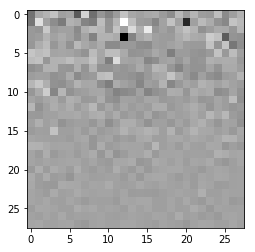

In [73]:
image_file_name = 'myletter.bmp'
img_array = scipy.misc.imread(image_file_name, flatten=True)
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.9) + 0.01
matplotlib.pyplot.imshow(img_data.reshape([28, 28]), cmap='Greys', interpolation='None')
n.query(img_data)
targets = numpy.zeros(output_nodes) + 0.01
targets[0] = 0.99
n.backquery(targets)

[ 0.99  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
[[  1.16318470e+00  -5.58044057e-01  -8.82816125e-01  -1.41806081e+00
   -3.06693283e-01  -4.40979669e-01   1.98838238e+00  -2.05873797e+00
    1.29215773e+00  -6.19419871e-03   5.78456918e-01  -1.43804340e-01
   -1.40823278e+00  -5.04193078e-01  -3.24826111e-01  -5.66083322e-01
   -6.28365785e-01  -1.45203556e-01   2.66468170e-01  -1.01202445e+00
   -2.04727845e-01  -9.26698644e-01  -2.22444325e-01  -1.13825957e-01
   -1.20079731e+00   3.34358789e-01  -2.62259418e-01  -8.37831329e-01
    1.00577091e+00  -2.64807471e+00  -3.59623712e-01   2.74346731e-01
    8.70069287e-01  -8.52173628e-01  -6.35509446e-01   5.44101721e-01
    8.49990644e-01  -1.17792307e+00   9.64379704e-02  -9.04809390e-01
   -4.59511985e+00  -1.18674495e+00  -2.43419848e-01  -1.34449086e-01
    5.03201817e-01  -3.79793832e-01  -1.39379653e+00  -3.77260106e-01
    3.37534489e+00  -2.90685584e-01  -1.05346336e+00  -6.37322202e-01
    1.05991042e-01   4.35019

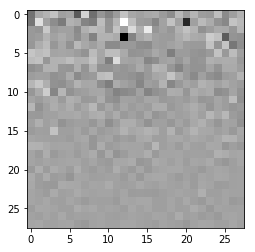

In [72]:
input_nodes = 784
hidden_nodes = 50
output_nodes = 10
learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
#n.query_hidden(img_data)
targets = numpy.zeros(output_nodes) + 0.01
targets[0] = 0.99
print(targets)

#n.backquery(targets)

inputs = n.backquery(targets)
print(inputs.T)
matplotlib.pyplot.imshow(inputs.reshape([28, 28]), cmap='Greys', interpolation='None')

In [64]:
print(inputs)

[[  3.06949367e-01]
 [  5.58228386e-01]
 [  1.15070301e+00]
 [  1.88389653e+00]
 [  1.33359536e-01]
 [  6.31550528e-01]
 [  1.46242752e+00]
 [  5.32895461e-01]
 [ -4.40293425e-01]
 [  1.41692063e+00]
 [ -4.27050485e-01]
 [  3.01224136e-01]
 [  8.04967518e-01]
 [ -2.56446846e-01]
 [ -2.28542005e-01]
 [ -4.59511985e+00]
 [ -9.78675692e-01]
 [  5.67590224e-01]
 [ -2.29387105e-01]
 [  8.94395989e-01]
 [  4.59511985e+00]
 [  3.91553381e-01]
 [  1.94612540e-01]
 [  1.11621240e+00]
 [  3.61678939e-02]
 [ -4.55809871e-01]
 [  9.31136120e-01]
 [  5.83384838e-01]
 [ -1.86362775e-01]
 [  1.01153654e-01]
 [ -5.18111373e-01]
 [  2.86368021e-01]
 [  1.27729251e+00]
 [  3.52933061e-01]
 [  9.20456967e-01]
 [ -8.37485941e-01]
 [  7.62209051e-01]
 [  1.63375151e-01]
 [ -4.37959786e-01]
 [  8.33947150e-01]
 [  9.62590393e-02]
 [  2.42116778e+00]
 [ -2.04377092e-01]
 [ -2.78346462e-01]
 [ -7.25238318e-02]
 [ -4.72136688e-01]
 [  2.06162949e-01]
 [ -8.16098318e-01]
 [  1.80973857e+00]
 [  1.89203762e+00]
